<a href="https://colab.research.google.com/github/debernall/Proyecto/blob/main/Proyecto_bootcamp_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introducción

# Proyecto Lluvia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os

In [2]:
import plotly.express as pex
from plotly.subplots import make_subplots
import plotly.graph_objects as go

*Sistema de archivos*

    ./
    
    ./Proyecto/
        ./Proyecto/Proyecto_bootcamp_cuaderno.ipynb

    ./Datasets/
        ./Datasets/...... .csv
    
    ./CleanDatasets/
        ./CleanDatasets/.....  .parquet


# Limpieza de archivos precipitaciones - conversión a parquet

### Primera exploración

Se importa el primer documento previo a la limpieza. Se inicia con el archivo de menor tamaño. Todos los datos corresponden a precipitación y tienen la misma unidad de medida.

In [28]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 #nrows=10
                 )
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,42077020,240,11/01/2023 07:30:00 PM,0.2,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
1,42077020,240,11/01/2023 11:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
2,42077020,240,11/01/2023 03:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
3,42077020,240,11/01/2023 09:30:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
4,42077020,240,11/01/2023 05:40:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
9147,42077020,240,06/22/2024 02:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9148,42077020,240,06/22/2024 01:30:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9149,42077020,240,06/22/2024 01:40:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9150,42077020,240,06/22/2024 01:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm


En la siguiente celda se imprime un pequeño resumen. Es importante resaltar que no hay datos nulos y la necesidad de cambiar el formato de cada columna por uno mas adecuado que reduzca el tamaño del dataframe.

In [29]:
size_0=df.memory_usage(deep=True).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoEstacion     9152 non-null   int64  
 1   CodigoSensor       9152 non-null   int64  
 2   FechaObservacion   9152 non-null   object 
 3   ValorObservado     9152 non-null   float64
 4   NombreEstacion     9152 non-null   object 
 5   Departamento       9152 non-null   object 
 6   Municipio          9152 non-null   object 
 7   ZonaHidrografica   9152 non-null   object 
 8   Latitud            9152 non-null   float64
 9   Longitud           9152 non-null   float64
 10  DescripcionSensor  9152 non-null   object 
 11  UnidadMedida       9152 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 858.1+ KB


### Vaupes

Se importa nuevamente el archivo csv, seleccionando las columnas relevantes y eligiendo un formato adeacuado para cada columna.

In [30]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0042077020,0240,11/01/2023 07:30:00 PM,0.2,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
1,0042077020,0240,11/01/2023 11:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
2,0042077020,0240,11/01/2023 03:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
3,0042077020,0240,11/01/2023 09:30:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
4,0042077020,0240,11/01/2023 05:40:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
...,...,...,...,...,...,...,...,...,...,...
9147,0042077020,0240,06/22/2024 02:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9148,0042077020,0240,06/22/2024 01:30:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9149,0042077020,0240,06/22/2024 01:40:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9150,0042077020,0240,06/22/2024 01:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


Se muestra una comparación entre el tamaño del dataframe tras el cambio de formato a las columnas

In [32]:
size_f=df.memory_usage(deep=True).sum()
print(size_f/size_0)

0.1759772734217371


**Formato de fecha**

In [33]:
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    9152 non-null   category      
 1   CodigoSensor      9152 non-null   category      
 2   FechaObservacion  9152 non-null   datetime64[ns]
 3   ValorObservado    9152 non-null   float32       
 4   NombreEstacion    9152 non-null   category      
 5   Departamento      9152 non-null   category      
 6   Municipio         9152 non-null   category      
 7   ZonaHidrografica  9152 non-null   category      
 8   Latitud           9152 non-null   category      
 9   Longitud          9152 non-null   category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 178.9 KB


In [35]:
df.to_parquet('../CleanDatasets/rain_vaupes.parquet')

In [8]:
namesFiles = os.listdir('../Datasets')
namesFiles = [re.findall(r'\((\w*)\)',x)[0] for x in namesFiles]
print(namesFiles)

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']


### Caquetá

Tener en cuenta que la información sobre caquetá está almacenada en dos archivos

#### Caquetá 2

In [9]:
nameFile = '../Datasets/Precipitaci_n_20241016('+ namesFiles[13] +').csv'
nameFile

'../Datasets/Precipitaci_n_20241016(caqueta2).csv'

In [38]:
df_caqueta2 = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df_caqueta2['FechaObservacion'] = pd.to_datetime(df_caqueta2['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_caqueta2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0044055010,0240,2023-09-13 01:50:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
1,0044035501,0240,2023-09-18 06:30:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
2,0044035501,0240,2023-09-19 07:50:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
3,0044035501,0240,2023-09-19 07:30:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
4,0044035501,0240,2023-09-18 09:20:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
...,...,...,...,...,...,...,...,...,...,...
14541,0044055010,0240,2024-06-12 02:30:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14542,0044055010,0240,2024-06-12 06:30:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14543,0044055010,0240,2024-06-12 12:50:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14544,0044055010,0240,2024-06-12 02:10:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111


La siguiente celda imprimirá la cantidad de valores de nulos

In [39]:
nulls = df_caqueta2.count(axis=1).sum()
size = df_caqueta2.shape[0]*df_caqueta2.shape[1]
print(size-nulls)

0


De nuevo se observa que el archivo tiene un tamaño menor y que los diferentes formatos son aplicados correctamente a cada columna

In [40]:
df_caqueta2.info()
#df_caqueta2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    14546 non-null  category      
 1   CodigoSensor      14546 non-null  category      
 2   FechaObservacion  14546 non-null  datetime64[ns]
 3   ValorObservado    14546 non-null  float32       
 4   NombreEstacion    14546 non-null  category      
 5   Departamento      14546 non-null  category      
 6   Municipio         14546 non-null  category      
 7   ZonaHidrografica  14546 non-null  category      
 8   Latitud           14546 non-null  category      
 9   Longitud          14546 non-null  category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 285.1 KB


### Todos los departamentos

In [7]:
print(namesFiles)
print(len(namesFiles))

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']
46


In [42]:
for name in namesFiles[:]:
    nameFile = '../Datasets/Precipitaci_n_20241016('+ name +').csv'
    df_dept = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
    df_dept['FechaObservacion'] = pd.to_datetime(df_dept['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
    nulls = df_dept.count(axis=1).sum()
    size = df_dept.shape[0]*df_dept.shape[1]
    if nulls-size != 0:
        print(f'{nulls-size} nulls in {name}, parquet file can not created')
    else:
        df_dept.to_parquet(f'../CleanDatasets/rain_{name}.parquet')


# Consolidación de archivos

Se requiere un conjunto de datos que contiene la información de las estaciones de monitoreo.

A continuación se listan los archivos de la segunda carpeta que contiene los datasets:

    - Catálogo nacional de estaciones (Contine el listado de las estaciones)
    - Datos de estaciones IDEAM y terceros (Contiene mediciones de diversas estaciones propias y externas al IDEAM)
    - Datos hidrometeorológicos (Mediciones de temperatura)
    - Presión atmosférica  

In [6]:
namesFiles2 = os.listdir('../Datasets2')
namesFiles2 = [x for x in namesFiles2]
print(namesFiles2)

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv', 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv', 'Presi_n_Atmosf_rica_20241017.csv']


### Limpieza *DATOS ESTACIONES IDEAM*

La ruta de acceso al archivo de Datos estaciones IDEAM es f'../Datasets2/{namesFiles2[1]}'

In [14]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            nrows=3
)
df_estaciones

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Entidad
0,2120500204,69,10/15/2024 09:04:00 PM,15.8,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,2120500204,70,10/15/2024 09:59:00 PM,15.5,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,2120500204,69,10/15/2024 10:25:00 PM,15.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [16]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category',12:'category'}
                            #nrows=3
)
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CodigoEstacion     202642 non-null  category
 1   CodigoSensor       202642 non-null  category
 2   FechaObservacion   202642 non-null  object  
 3   ValorObservado     202642 non-null  float32 
 4   NombreEstacion     202642 non-null  category
 5   Departamento       202642 non-null  category
 6   Municipio          202642 non-null  category
 7   ZonaHidrografica   202642 non-null  category
 8   Latitud            202642 non-null  category
 9   Longitud           202642 non-null  category
 10  DescripcionSensor  202642 non-null  category
 11  UnidadMedida       202642 non-null  category
 12  Entidad            202642 non-null  category
dtypes: category(11), float32(1), object(1)
memory usage: 5.3+ MB


Se evidencia que no hay valores nulos. Hacemos una conversión a formato de fecha y almacenamos el archivo en formato .parquet

In [22]:
df_estaciones['FechaObservacion'] = pd.to_datetime(df_estaciones['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CodigoEstacion     202642 non-null  category      
 1   CodigoSensor       202642 non-null  category      
 2   FechaObservacion   202642 non-null  datetime64[ns]
 3   ValorObservado     202642 non-null  float32       
 4   NombreEstacion     202642 non-null  category      
 5   Departamento       202642 non-null  category      
 6   Municipio          202642 non-null  category      
 7   ZonaHidrografica   202642 non-null  category      
 8   Latitud            202642 non-null  category      
 9   Longitud           202642 non-null  category      
 10  DescripcionSensor  202642 non-null  category      
 11  UnidadMedida       202642 non-null  category      
 12  Entidad            202642 non-null  category      
dtypes: category(11), datetime64[ns](1), float32(

In [24]:
df_estaciones.to_parquet('../CleanDatasets2/estaciones.parquet')

### Limpieza *DATOS PRESIÓN ATMOSFÉRICA*

In [25]:
namesFiles2

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv',
 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv',
 'Presi_n_Atmosf_rica_20241017.csv']

La ruta de acceso a los datos de presión atmosférica es: f '../Datasets2/{namesFiles2[-1]}']

In [27]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        nrows=3
)
df_presion

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,36015020,255,10/03/2017 06:00:00 AM,992.5,EL DIAMANTE - AUT,CASANARE,PAZ DE ARIPORO,META,5.816194,-71.419833,Presión Atmosferica (1h),HPa
1,21195190,255,02/14/2014 05:00:00 AM,785.2,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111,-74.311750,Presión Atmosferica (1h),HPa
2,21015050,255,09/27/2013 06:00:00 PM,805.3,PURACE - AUT,HUILA,SAN AGUSTÍN,ALTO MAGDALENA,1.925917,-76.427556,Presión Atmosferica (1h),HPa


In [28]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_presion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22611008 entries, 0 to 22611007
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 582.3+ MB


In [30]:
df_presion['FechaObservacion'] = pd.to_datetime(df_presion['FechaObservacion'],format='%m/%d/%Y %H:%M:%S %p')
df_presion

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,0036015020,0255,2017-10-03 06:00:00,992.500000,EL DIAMANTE - AUT,CASANARE,PAZ DE ARIPORO,META,5.816194444,-71.41983333,Presión Atmosferica (1h),HPa
1,0021195190,0255,2014-02-14 05:00:00,785.200012,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111111,-74.31175,Presión Atmosferica (1h),HPa
2,0021015050,0255,2013-09-27 06:00:00,805.299988,PURACE - AUT,HUILA,SAN AGUSTÍN,ALTO MAGDALENA,1.925916667,-76.42755556,Presión Atmosferica (1h),HPa
3,0021115010,0255,2005-11-28 10:00:00,958.500000,DESIERTO TATACOA,HUILA,VILLAVIEJA,ALTO MAGDALENA,3.234,-75.168,Presión Atmosferica (1h),HPa
4,0028035060,0255,2008-04-08 04:00:00,988.700012,FEDEARROZ - AUT,CESAR,VALLEDUPAR,CESAR,10.46361111,-73.24805556,Presión Atmosferica (1h),HPa
...,...,...,...,...,...,...,...,...,...,...,...,...
22611003,0048015050,0258,2024-10-16 11:04:00,1000.500000,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861111,-69.94091667,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611004,0048015050,0258,2024-10-16 09:08:00,1004.099976,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861111,-69.94091667,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611005,0016015501,0258,2024-10-16 07:02:00,972.900024,AEROPUERTO CAMILO DAZA,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.93028,-72.50917,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611006,0048015040,0255,2024-10-16 10:40:00,997.400024,PUERTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780305556,-70.36263889,PRESIÓN ATMOSFÉRICA,hPa


In [32]:
df_presion.count()

CodigoEstacion       22611008
CodigoSensor         22611008
FechaObservacion     22611008
ValorObservado       22611008
NombreEstacion       22611008
Departamento         22611008
Municipio            22611008
ZonaHidrografica     22611008
Latitud              22611008
Longitud             22611008
DescripcionSensor    22611008
UnidadMedida         22611008
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [33]:
df_presion.to_parquet('../CleanDatasets2/presion.parquet')

### Limpieza *DATOS TEMPERATURA*

Los datos de temperatura se distribuyen en 5 archivos csv distintos, todos con las mismas columnas. La ruta de acceso a los archivos es 

- '../Datasets2/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(*)' Donde * es un valor entre 0 y 4

In [7]:
namesFiles2[2:-1]

['Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv']

In [37]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        nrows=3
)
df_temp

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,48015050,71,01/04/2024 09:58:00 PM,21.1,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861,-69.940917,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
1,15065180,71,01/04/2024 07:46:00 PM,22.3,AEROPUERTO ALM. PADILLA -,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.528444,-72.917722,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
2,3502500135,71,01/04/2024 03:56:00 AM,17.0,GUAYABETAL POLLO OLIMPICO,CUNDINAMARCA,GUAYABETAL,META,4.225530,-73.814810,GPRS - TEMPERATURA DEL AIRE A 2 m,°C


In [48]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
df_temp

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,0048015050,0071,01/04/2024 09:58:00 PM,21.100000,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.19386111,-69.94091667,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
1,0015065180,0071,01/04/2024 07:46:00 PM,22.299999,AEROPUERTO ALM. PADILLA -,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.5284444,-72.91772222,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
2,3502500135,0071,01/04/2024 03:56:00 AM,17.000000,GUAYABETAL POLLO OLIMPICO,CUNDINAMARCA,GUAYABETAL,META,4.22553,-73.81481,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
3,0016015501,0071,01/04/2024 04:30:00 PM,28.500000,AEROPUERTO CAMILO DAZA,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.93028,-72.50917,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4,0026125710,0071,01/04/2024 06:58:00 AM,20.900000,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.73951944,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
4101303,0015015050,0071,10/16/2024 10:08:00 AM,29.700001,AEROPUERTO SIMON BOLIVAR,MAGDALENA,SANTA MARTA,CARIBE - GUAJIRA,11.1146944,-74.231027778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101304,0026125710,0071,10/16/2024 05:32:00 AM,18.500000,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.739519444,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101305,0015015050,0071,10/16/2024 07:20:00 PM,28.000000,AEROPUERTO SIMON BOLIVAR,MAGDALENA,SANTA MARTA,CARIBE - GUAJIRA,11.1146944,-74.231027778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101306,0017015010,0071,10/16/2024 01:04:00 PM,26.900000,AEROPUERTO SESQUICENTENARIO,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,SAN ANDRÉS,ISLAS CARIBE,12.587849,-81.701117,GPRS - TEMPERATURA DEL AIRE A 2 m,°C


In [49]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 86.1+ MB


In [50]:
df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CodigoEstacion     category      
 1   CodigoSensor       category      
 2   FechaObservacion   datetime64[ns]
 3   ValorObservado     float32       
 4   NombreEstacion     category      
 5   Departamento       category      
 6   Municipio          category      
 7   ZonaHidrografica   category      
 8   Latitud            category      
 9   Longitud           category      
 10  DescripcionSensor  category      
 11  UnidadMedida       category      
dtypes: category(10), datetime64[ns](1), float32(1)
memory usage: 86.1 MB


In [51]:
df_temp.to_parquet('../CleanDatasets2/Temp_0.parquet')

In [8]:
index_temp = 1
for i in namesFiles2[3:-1]:
    df_temp = pd.read_csv(
                        f'../Datasets2/{i}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
    df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
    df_temp.to_parquet(f'../CleanDatasets2/Temp_{str(index_temp)}.parquet')
    index_temp += 1

# Análisis exploratorio de datos

In [2]:
df_2 = pd.read_parquet(f'../CleanDatasets/rain_boyaca.parquet')
df_2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0023125160,0240,2009-10-07 02:10:00,0.1,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647027778,-74.07130556
1,0024035410,0240,2012-12-17 03:10:00,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333333,-72.91115278
2,0023125501,0240,2019-03-21 07:10:00,0.0,PAUNA - AUT,BOYACÁ,PAUNA,MEDIO MAGDALENA,5.657130556,-73.96032778
3,0035085070,0240,2018-07-28 02:30:00,0.0,SANTA MARIA - AUT,BOYACÁ,SANTA MARÍA,META,4.84125,-73.25669444
4,0024035410,0240,2018-01-20 05:37:00,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333333,-72.91115278
...,...,...,...,...,...,...,...,...,...,...
13730165,0024035340,0257,2024-10-15 12:52:00,0.0,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667
13730166,2403000117,0257,2024-10-15 09:44:00,0.0,PM LA LAGUNA,BOYACÁ,GUACAMAYAS,SOGAMOSO,6.447166667,-72.497694444
13730167,0035217090,0240,2024-10-15 02:40:00,0.0,LABRANZA GRANDE,BOYACÁ,LABRANZAGRANDE,META,5.566916667,-72.58355556
13730168,2403700149,0240,2024-10-15 03:40:00,0.0,PUENTE LA RAMADA,BOYACÁ,CHISCAS,SOGAMOSO,6.5607,-72.5012


In [3]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730170 entries, 0 to 13730169
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    category      
 1   CodigoSensor      category      
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    category      
 5   Departamento      category      
 6   Municipio         category      
 7   ZonaHidrografica  category      
 8   Latitud           category      
 9   Longitud          category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 261.9 MB


In [4]:
df_2['Year'] = df_2['FechaObservacion'].dt.year
df_2['Month'] = df_2['FechaObservacion'].dt.month
year_total = (
    df_2
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total

,Year,ValorObservado
0,2005,2339.300049
1,2006,2464.699951
2,2007,7516.899902
3,2008,4902.600098
4,2009,3027.100098
5,2010,6817.899902
6,2011,6794.899902
7,2012,4585.799805
8,2013,4849.600098
9,2014,3081.699951


In [5]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])

fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)
###### Si sale error, toca instalar nbformat

Los archivos en formato parquet pueden ser consultados en la carpeta compartida de google drive: https://drive.google.com/drive/folders/1h9_VFIFKbZ8tiavxZM9Nm9koIxJxtCWf?usp=sharing

Se puede acceder a la carpeta compartida desde local instalando la versión de escritorio y buscando la ruta de los archivos.

In [21]:
namesFiles = os.listdir(r'G:\Mi unidad\Bootcamp\Proyecto_Bootcamp\Data\CleanDatasets')
print('Primeros 23')
print(namesFiles[0:23])
print('Últimos 23')
print(namesFiles[23:-1])

Primeros 23
['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta2.parquet', 'rain_caqueta1.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet']
Últimos 23
['rain_guaviare.parquet', 'rain_guajira.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres4.parquet', 'rain_sanandres3.parquet', 'rain_sa

CleanDatasets contiene los archivos parquet sobre precipitaciones

CleanDatasets2 contiene los archivos parquet sobre temperatura, presión, catálogo de estaciones.

Configuramos rutas para trabajar en local.

In [13]:
path = r'G:\Mi unidad\Bootcamp\Proyecto_Bootcamp\Data'                      

In [4]:
path = r'C:\Users\Josue Florez\Documents\Maria Angelica\Proyectos\Proyecto_bootcamp\Data'

## 23 primeros archivos de precipitación

In [5]:
folder_path = path

files = [f for f in os.listdir(folder_path)]

for file in files:
    file_path = os.path.join(folder_path, file)
    
    
    df = pd.read_parquet(file_path)
    rows, cols = df.shape
    
    print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")


Archivo: estaciones.parquet - Filas: 202642, Columnas: 13
Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Archivo: rain_atlantico1.parquet - Filas: 1371211, Columnas: 10
Archivo: rain_atlantico2.parquet - Filas: 1156367, Columnas: 10
Archivo: rain_bogota1.parquet - Filas: 1779933, Columnas: 10
Archivo: rain_bogota2.parquet - Filas: 19408968, Columnas: 10
Archivo: rain_bogota3.parquet - Filas: 3180034, Columnas: 10
Archivo: rain_bolivar1.parquet - Filas: 1917368, Columnas: 10
Archivo: rain_bolivar2.parquet - Filas: 1498134, Columnas: 10
Archivo: rain_boyaca.parquet - Filas: 13730170, Columnas: 10
Archivo: rain_caldas.parquet - Filas: 9882585, Columnas: 10
Archivo: rain_caqueta1.parquet - Filas: 1312815, Columnas: 10
Archivo: rain_caqueta2.parquet - Filas: 14546, Columnas: 10
Archivo: rain_casanare.parquet - Filas: 2615277, Columnas: 10
Archivo: rain_cau

In [6]:
pd.set_option('display.max_columns', None)

for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")


Archivo: estaciones.parquet - Filas: 202642, Columnas: 13
Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Archivo: rain_atlantico1.parquet - Filas: 1371211, Columnas: 10
Archivo: rain_atlantico2.parquet - Filas: 1156367, Columnas: 10
Archivo: rain_bogota1.parquet - Filas: 1779933, Columnas: 10
Archivo: rain_bogota2.parquet - Filas: 19408968, Columnas: 10
Archivo: rain_bogota3.parquet - Filas: 3180034, Columnas: 10
Archivo: rain_bolivar1.parquet - Filas: 1917368, Columnas: 10
Archivo: rain_bolivar2.parquet - Filas: 1498134, Columnas: 10
Archivo: rain_boyaca.parquet - Filas: 13730170, Columnas: 10
Archivo: rain_caldas.parquet - Filas: 9882585, Columnas: 10
Archivo: rain_caqueta1.parquet - Filas: 1312815, Columnas: 10
Archivo: rain_caqueta2.parquet - Filas: 14546, Columnas: 10
Archivo: rain_casanare.parquet - Filas: 2615277, Columnas: 10
Archivo: rain_cau

In [7]:
for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    column_types = df.dtypes  
    
    print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")
    print("Tipos de las columnas:")
    print(column_types)
    print("\n")

Archivo: estaciones.parquet - Filas: 202642, Columnas: 13
Tipos de las columnas:
CodigoEstacion             category
CodigoSensor               category
FechaObservacion     datetime64[ns]
ValorObservado              float32
NombreEstacion             category
Departamento               category
Municipio                  category
ZonaHidrografica           category
Latitud                    category
Longitud                   category
DescripcionSensor          category
UnidadMedida               category
Entidad                    category
dtype: object


Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Tipos de las columnas:
CodigoEstacion            category
CodigoSensor              category
FechaObservacion    datetime64[ns]
ValorObservado             float32
NombreEstacion            category
Departamento              category
Municipio                 category
ZonaHidrografica          category
Latitud                   category
Longitud                  category
d

In [8]:

fecha_columna = 'FechaObservacion' 

for file in files:
    file_path = os.path.join(folder_path, file)

    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    if fecha_columna in df.columns:
       
        df[fecha_columna] = pd.to_datetime(df[fecha_columna], errors='coerce')

       
        fecha_minima = df[fecha_columna].min()
        fecha_maxima = df[fecha_columna].max()
        
        print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")
        print(f"Fecha mínima: {fecha_minima}")
        print(f"Fecha máxima: {fecha_maxima}\n")
    else:
        print(f"Archivo: {file} - No se encontró la columna '{fecha_columna}'\n")


Archivo: estaciones.parquet - Filas: 202642, Columnas: 13
Fecha mínima: 2024-09-18 01:00:00
Fecha máxima: 2024-10-17 12:59:00

Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Fecha mínima: 2017-01-20 07:40:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Fecha mínima: 2005-01-01 01:00:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Fecha mínima: 2017-01-18 09:10:00
Fecha máxima: 2024-10-15 12:50:00

Archivo: rain_atlantico1.parquet - Filas: 1371211, Columnas: 10
Fecha mínima: 2016-12-31 11:10:00
Fecha máxima: 2023-09-11 12:50:00

Archivo: rain_atlantico2.parquet - Filas: 1156367, Columnas: 10
Fecha mínima: 2016-12-31 11:40:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_bogota1.parquet - Filas: 1779933, Columnas: 10
Fecha mínima: 2024-06-13 12:00:00
Fecha máxima: 2024-10-15 12:59:00

Archivo: rain_bogota2.parquet - Filas: 19408968, Columnas: 10
Fecha mínima: 2004-10-20

# EDA Bogota2

In [11]:
file_bogota=path+r'\rain_bogota2.parquet'
df_bogota = pd.read_parquet(file_bogota)

In [12]:
df_bogota.describe()

,FechaObservacion,ValorObservado
count,19408968,1.940897e+07
mean,2016-05-10 06:46:00.282438656,9.285593e-03
min,2004-10-20 02:00:00,0.000000e+00
25%,2013-03-31 07:45:00,0.000000e+00
50%,2018-09-27 09:23:00,0.000000e+00
75%,2019-08-15 05:48:00,0.000000e+00
max,2023-09-11 12:50:00,3.000000e+01
std,NaN,2.011247e-01


In [13]:
df_bogota.describe(include=['category'])

,CodigoEstacion,CodigoSensor,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
count,19408968,19408968,19408968,19408968,19408968,19408968,19408968,19408968
unique,39,1,39,2,1,2,35,35
top,2120000108,0240,IDIGER - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.567,-74.05
freq,841467,19408968,841467,17036295,19408968,18659116,1259301,1757048


In [14]:

print(df_bogota['Departamento'].value_counts())
print(df_bogota['NombreEstacion'].value_counts())


Departamento
BOGOTA D.C.    17036295
BOGOTA          2372673
Name: count, dtype: int64
NombreEstacion
IDIGER - AUT                                  841467
COLEGIO VEINTIUN ANGELES - AUT                732116
COLEGIO ALEMANIA SOLIDARIA - AUT              715604
CERRO NORTE - AUT                             697297
EL CODITO - AUT                               693955
LA FISCALA - AUT                              689910
COLEGIO RODOLFO LLINAS - AUT                  684911
GRAN BRETAÑA - AUT                            682736
COLEGIO CARLOS PIZARRO - AUT                  681864
SAN FRANCISCO - AUT                           680832
CASAS FISCALES ESCUELA DE ARTILLERÍA - AUT    680576
COLEGIO MIGUEL ANTONIO CARO - AUT             668728
QUIBA - FOPAE                                 653329
SIERRA MORENA - FOPAE                         648486
VILLA TERESA - AUT                            647518
VITELMA                                       642926
IDEAM BOGOTA  - AUT                           6415

In [15]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
year_total = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total

,Year,ValorObservado
0,2004,57.200001
1,2005,202.400009
2,2006,1516.599976
3,2007,1700.900024
4,2008,14430.000000
5,2009,9930.799805
6,2010,20881.599609
7,2011,15690.600586
8,2012,15729.900391
9,2013,13930.080078


In [26]:
year_mean = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .mean()
    .reset_index()
)
year_mean

,Year,ValorObservado
0,2004,0.009537
1,2005,0.004643
2,2006,0.031826
3,2007,0.019462
4,2008,0.023179
5,2009,0.013095
6,2010,0.022943
7,2011,0.015208
8,2012,0.014889
9,2013,0.010457


In [18]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])
fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [22]:
month_total = (
    df_bogota
    .groupby(["Month"])["ValorObservado"]
    .sum()
    .reset_index()
)
month_total

,Month,ValorObservado
0,1,8070.970215
1,2,11862.580078
2,3,19843.589844
3,4,19879.570312
4,5,14989.100586
5,6,13851.969727
6,7,10741.929688
7,8,11489.980469
8,9,7634.050293
9,10,22900.550781


In [25]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Meses'])
fig.add_trace(
    go.Scatter(x=month_total["Month"], y = month_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [29]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
df_grouped = df_bogota.groupby(['Year', 'Month'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month', 'Valor Total', 'Valor Promedio']

df_grouped

,Year,Month,Valor Total,Valor Promedio
0,2004,10,32.500000,0.026793
1,2004,11,22.799999,0.007289
2,2004,12,1.900000,0.001147
3,2005,1,2.900000,0.001317
4,2005,2,18.400000,0.005380
...,...,...,...,...
222,2023,4,434.829987,0.045556
223,2023,5,289.549988,0.027101
224,2023,6,47.759998,0.011717
225,2023,8,197.300003,0.036762


In [48]:
df_grouped.max()

Year              2023.000000
Month               12.000000
Valor Total       9439.700195
Valor Promedio       0.391020
dtype: float64

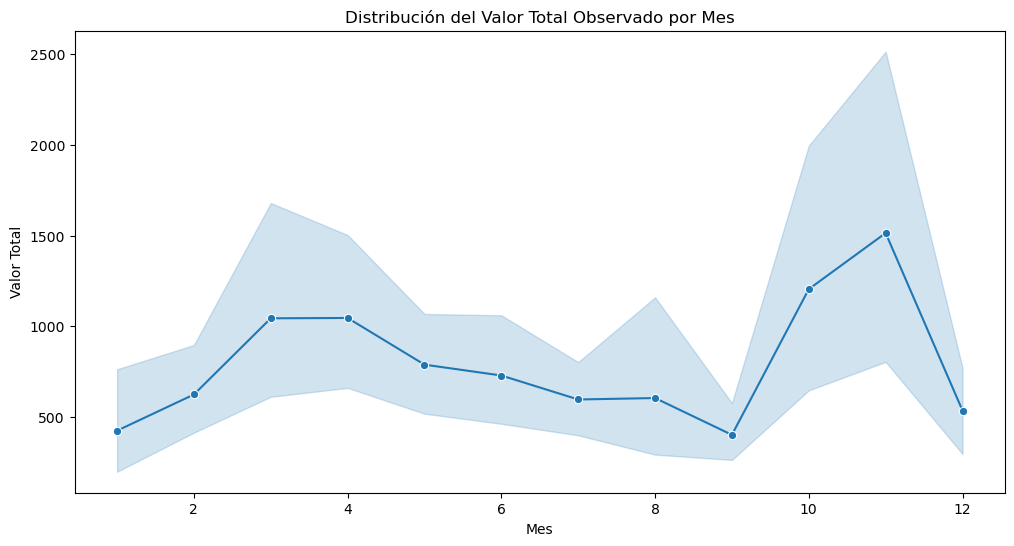

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Total', data=df_grouped, marker='o')
plt.title('Distribución del Valor Total Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Total')
plt.show()

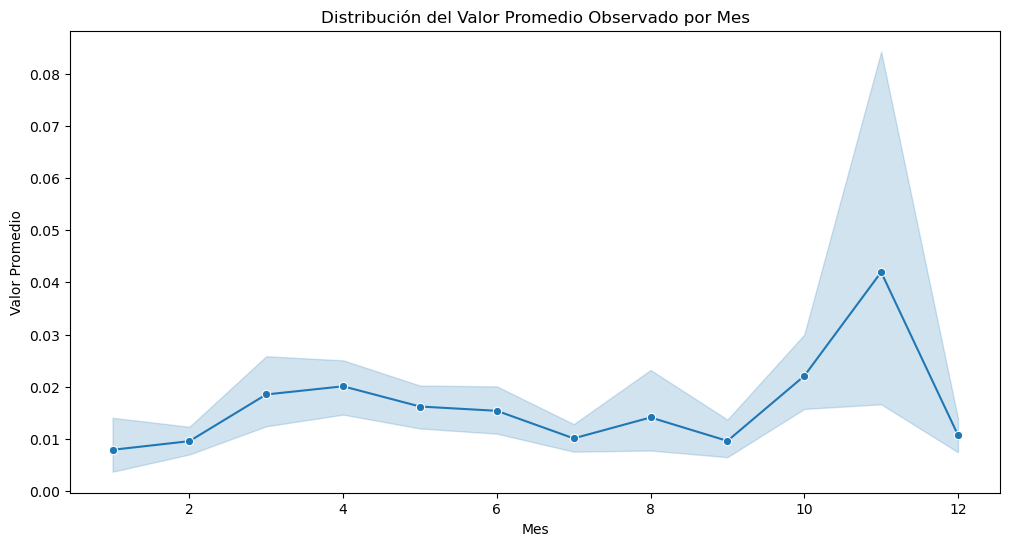

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Promedio', data=df_grouped, marker='o')
plt.title('Distribución del Valor Promedio Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio')
plt.show()

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_15388\1935551366.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




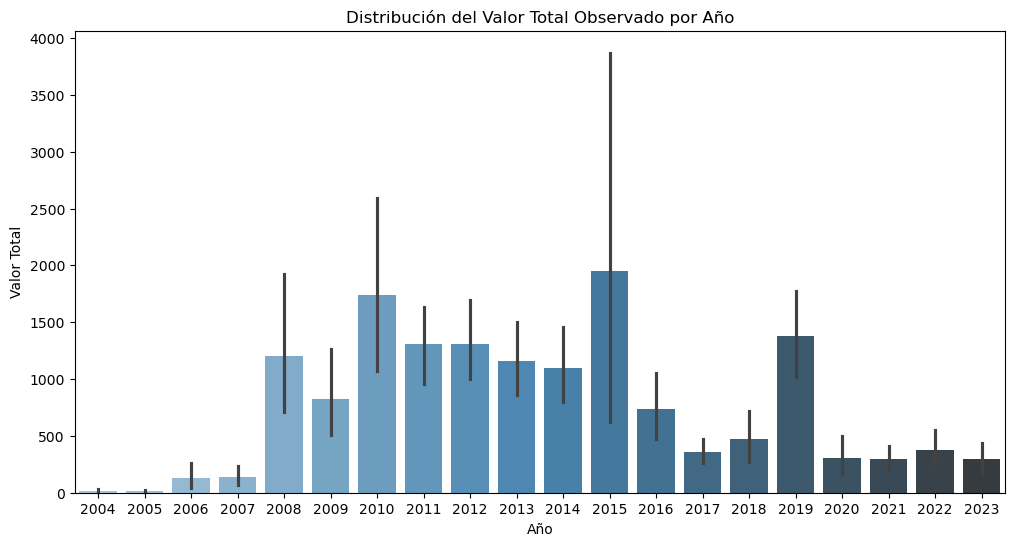

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Total', data=df_grouped, palette='Blues_d')
plt.title('Distribución del Valor Total Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total')
plt.show()

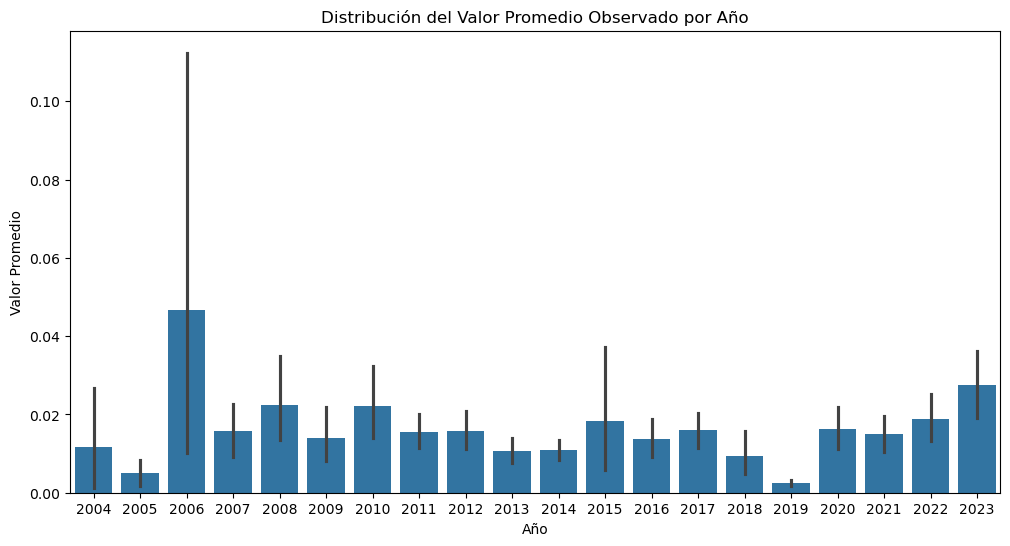

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Promedio', data=df_grouped)
plt.title('Distribución del Valor Promedio Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.show()

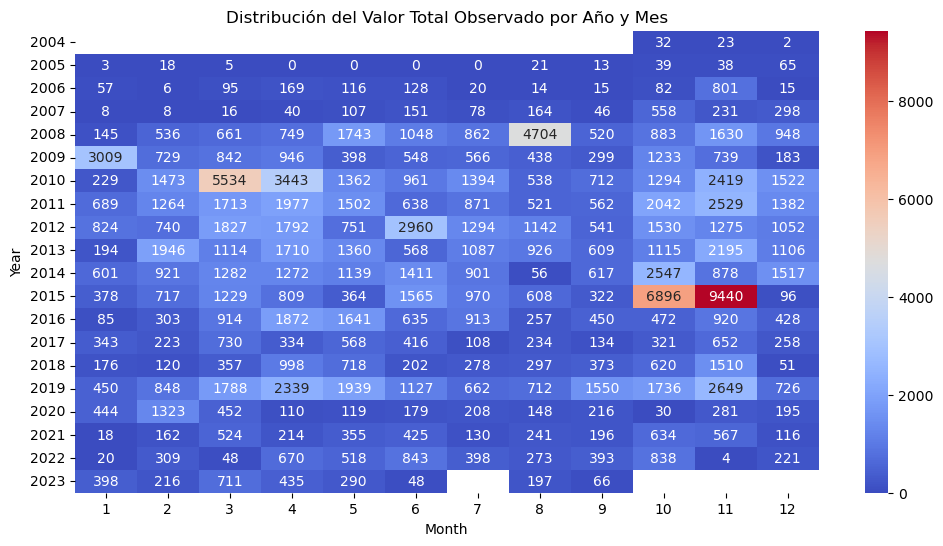

In [53]:
df_pivot = df_grouped.pivot(index='Year', columns='Month', values='Valor Total')

# Heatmap para visualizar el valor total observado por año y mes
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='coolwarm',annot=True,fmt='.0f')
plt.title('Distribución del Valor Total Observado por Año y Mes')
plt.show()

In [56]:
df_grouped = df_bogota.groupby(['Year', 'Month','Latitud','Longitud'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month','Latitud','Longitud', 'Valor Total', 'Valor Promedio']

df_grouped

C:\Users\Josue Florez\AppData\Local\Temp\ipykernel_15388\1044252746.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Year,Month,Latitud,Longitud,Valor Total,Valor Promedio
0,2004,1,4.343,-74.017,0.0,NaN
1,2004,1,4.343,-74.019,0.0,NaN
2,2004,1,4.343,-74.022,0.0,NaN
3,2004,1,4.343,-74.031,0.0,NaN
4,2004,1,4.343,-74.05,0.0,NaN
...,...,...,...,...,...,...
293995,2023,12,4.138,-74.184,0.0,NaN
293996,2023,12,4.138,-74.205,0.0,NaN
293997,2023,12,4.138,-74.233,0.0,NaN
293998,2023,12,4.138,-74.317,0.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Josue Florez\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

c:\Users\Josue Florez\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



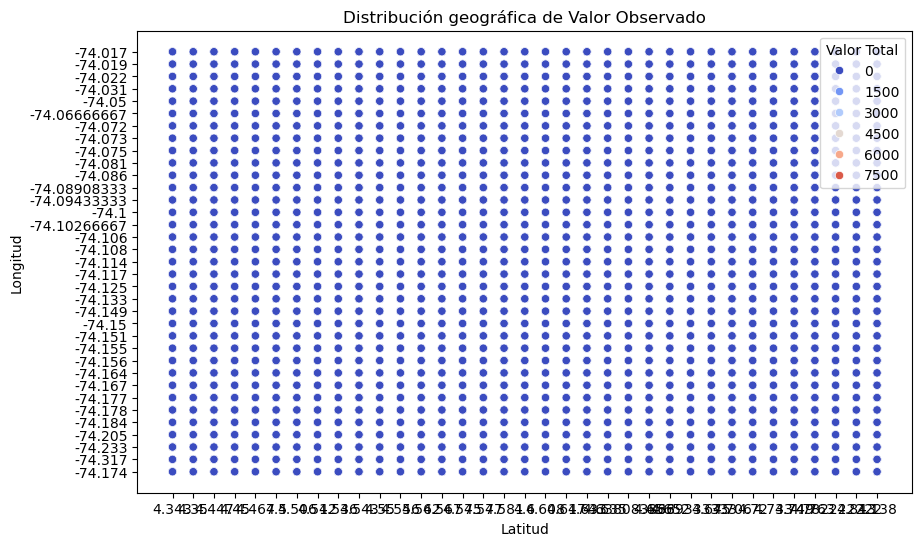

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitud', y='Longitud', hue='Valor Total', data=df_grouped, palette='coolwarm')
plt.title('Distribución geográfica de Valor Observado')
plt.show

## 23 últimos archivos de precipitación

Lista de archivos:

In [41]:
namesFiles = os.listdir(path+r'\CleanDatasets')[23:-1]
print(namesFiles)

['rain_guaviare.parquet', 'rain_guajira.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres4.parquet', 'rain_sanandres3.parquet', 'rain_santander.parquet', 'rain_sucre.parquet', 'rain_tolima.parquet', 'rain_valle_del_cauca.parquet', 'rain_vaupes.parquet', 'rain_vaupes1.parquet', 'rain_vichada.parquet']


### Dimensionalidad de los dataset

In [77]:
dim = pd.DataFrame(columns=['File','Rows','Columns','Size','Nulls'])

for i in namesFiles:
    path_file = path + '\\CleanDatasets\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    row = pd.DataFrame({'File':[i],'Rows':[df_dept2.shape[0]],'Columns':[df_dept2.shape[1]],'Size':[df_dept2.size],'Nulls':[df_dept2.size-df_dept2.count().sum()]})
    dim = pd.concat([dim,row], ignore_index=True)

dim

,File,Rows,Columns,Size,Nulls
0,rain_guaviare.parquet,29100,10,291000,0
1,rain_guajira.parquet,4448321,10,44483210,0
2,rain_huila.parquet,10676628,10,106766280,0
3,rain_magdalena.parquet,5150365,10,51503650,0
4,rain_meta.parquet,2470476,10,24704760,0
5,rain_narino.parquet,469965,10,4699650,0
6,rain_narino1.parquet,5432162,10,54321620,0
7,rain_nill.parquet,334763,10,3347630,0
8,rain_norte_de_santander.parquet,8764156,10,87641560,0
9,rain_putumayo.parquet,854162,10,8541620,0


Tipos de datos

In [72]:
for i in namesFiles:
    path_file = path + '\\CleanDatasets\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    columns = df_dept2.dtypes.to_dict()
    row = pd.DataFrame(columns, index=)
    dim = pd.concat([dim,row], ignore_index=True)

types

{'CodigoEstacion': CategoricalDtype(categories=['0035260050', '3526500201'], ordered=False, categories_dtype=object),
 'CodigoSensor': CategoricalDtype(categories=['0240'], ordered=False, categories_dtype=object),
 'FechaObservacion': dtype('<M8[ns]'),
 'ValorObservado': dtype('float32'),
 'NombreEstacion': CategoricalDtype(categories=['LA PRIMAVERA', 'VUELTA MALA'], ordered=False, categories_dtype=object),
 'Departamento': CategoricalDtype(categories=['VICHADA'], ordered=False, categories_dtype=object),
 'Municipio': CategoricalDtype(categories=['LA PRIMAVERA'], ordered=False, categories_dtype=object),
 'ZonaHidrografica': CategoricalDtype(categories=['META', 'ORINOCO'], ordered=False, categories_dtype=object),
 'Latitud': CategoricalDtype(categories=['5.48088889', '5.561', '5.56136111', '5.480888889',
                   '5.561361111'],
 , ordered=False, categories_dtype=object),
 'Longitud': CategoricalDtype(categories=['-70.281', '-70.42130556', '-70.28063889', '-70.421305556'], ord

In [81]:
df_dept2.dtypes.to_dict()

{'CodigoEstacion': CategoricalDtype(categories=['0035260050', '3526500201'], ordered=False, categories_dtype=object),
 'CodigoSensor': CategoricalDtype(categories=['0240'], ordered=False, categories_dtype=object),
 'FechaObservacion': dtype('<M8[ns]'),
 'ValorObservado': dtype('float32'),
 'NombreEstacion': CategoricalDtype(categories=['LA PRIMAVERA', 'VUELTA MALA'], ordered=False, categories_dtype=object),
 'Departamento': CategoricalDtype(categories=['VICHADA'], ordered=False, categories_dtype=object),
 'Municipio': CategoricalDtype(categories=['LA PRIMAVERA'], ordered=False, categories_dtype=object),
 'ZonaHidrografica': CategoricalDtype(categories=['META', 'ORINOCO'], ordered=False, categories_dtype=object),
 'Latitud': CategoricalDtype(categories=['5.48088889', '5.561', '5.56136111', '5.480888889',
                   '5.561361111'],
 , ordered=False, categories_dtype=object),
 'Longitud': CategoricalDtype(categories=['-70.281', '-70.42130556', '-70.28063889', '-70.421305556'], ord